In [72]:
# all useful libraries

import matplotlib.pyplot as plt
import numpy as np

# **1. Unit Norm Ball:**

In [73]:
# an utility function to get the multiple indices between -1 and 1
def getIndices(range_count):
    x_indices = np.linspace(-1,1,range_count)
    return x_indices
x_indices = getIndices(5000)

In [74]:
# 1.a Function which accepts p and plots the Unit Norm ball for corresponding p

def plot_norm_ball(p):
    # calculating the Y for x indices
    y_indices = [pow(1-pow(abs(x),p),1/p) for x in x_indices]
    # creating the counter part
    y_dash = [-y for y in y_indices]

    # plotting with the data we have
    plt.ylim(-1,1)
    plt.yscale('linear')
    plt.plot(x_indices,y_indices,color='red',label=f'p={p}')
    plt.plot(x_indices,y_dash,color='red')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.fill_between(x_indices,y_indices,color='grey',alpha=0.2)
    plt.fill_between(x_indices,y_dash,color='grey',alpha=0.2)
    plt.xlabel('Variation in x')
    plt.ylabel('Variation in y')
    plt.legend(loc=0)
    plt.show()

Norm Balls with p >= 1


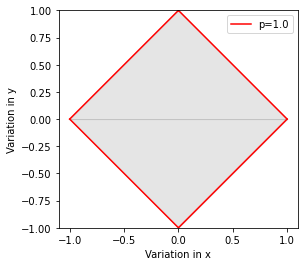

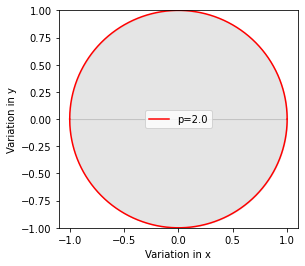

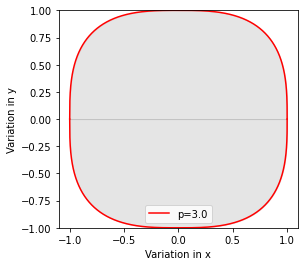

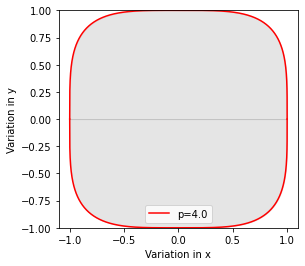

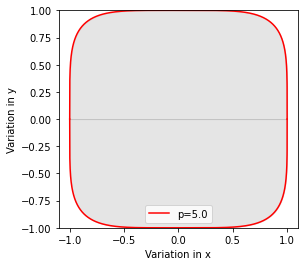

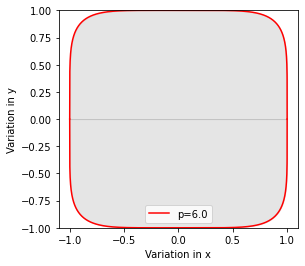

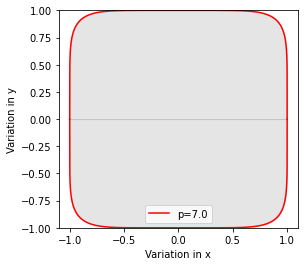

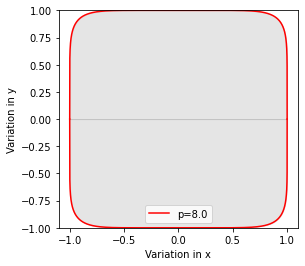

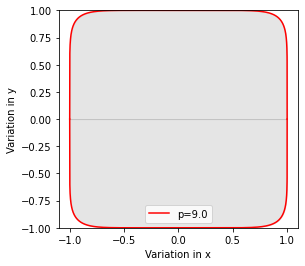

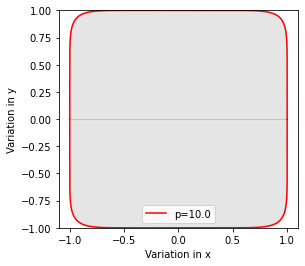

Norm Balls with 0 < p <= 1


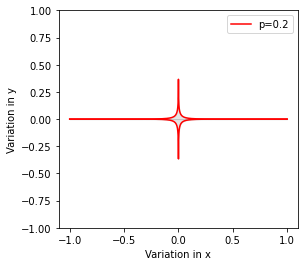

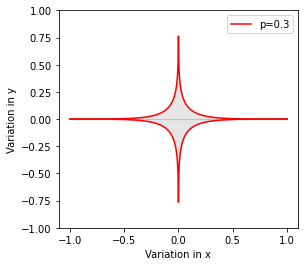

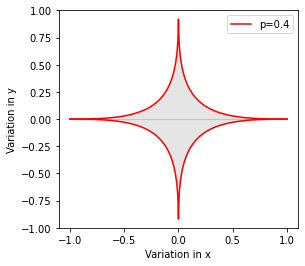

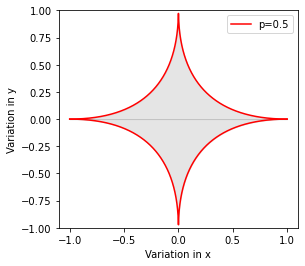

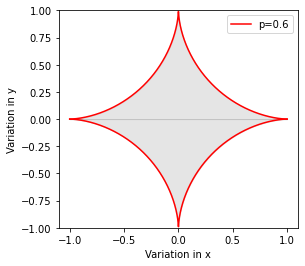

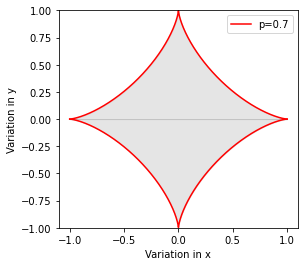

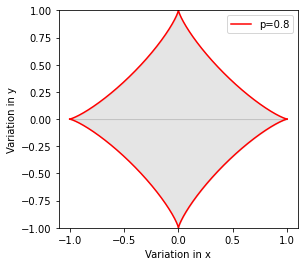

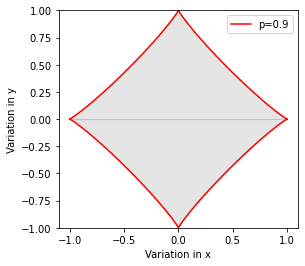

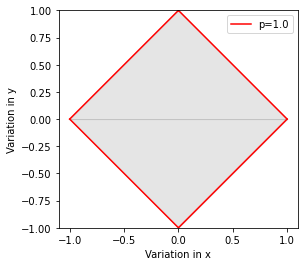

In [75]:
# testing with multiple values of P

# p values greater than or equals to 1
p_arr = np.linspace(1,10,10)
print('Norm Balls with p >= 1')
for p in p_arr:
    plot_norm_ball(p)

# p values 0 < p < 1
p_arr = np.round(np.linspace(0.2,1,9),2)
print('Norm Balls with 0 < p <= 1')
for p in p_arr:
    plot_norm_ball(p)


**1.b Observations** \\
Claim : Unit norm ball is convex for p >= 1 \\
It is clearly visible from the graphs plotted that when p is >= 1, the balls are convex. If we draw a line between any two points in the ball, the line lies entirely in the graph itself, suggesting that the graphs obtained are convex. \\
When p tends to positive ```Infinity```, the ball tends to be a square.

On the other hand, while 0 < p < 1, the graphs obtained are concave. If we observe along the sides of the graph, if we try to draw a line between two extreme points, it gets out of the graph, suggesting that the graph obtained is concave.


# **2. Completeness**



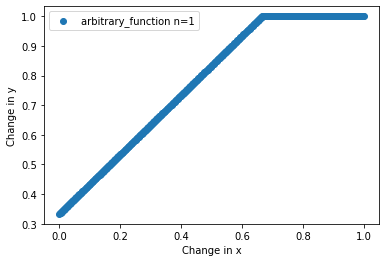

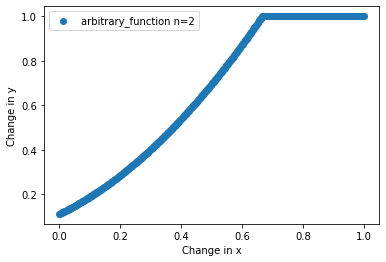

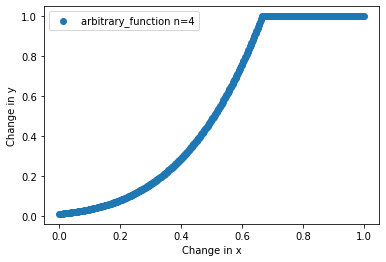

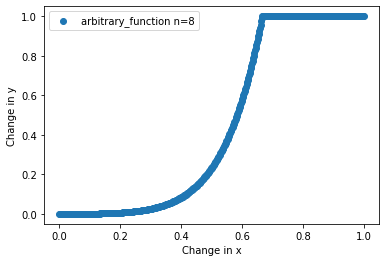

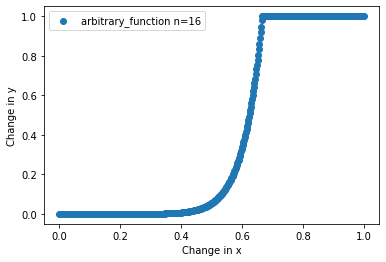

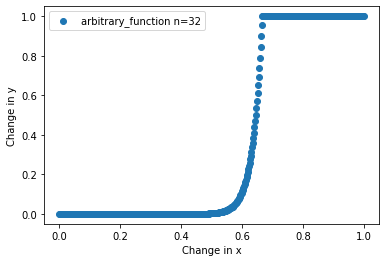

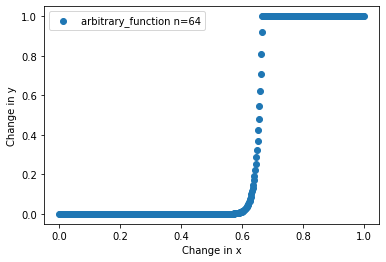

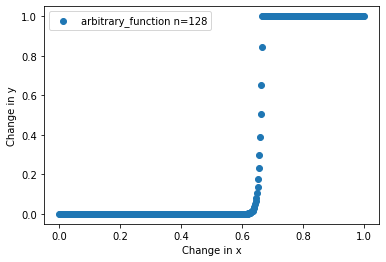

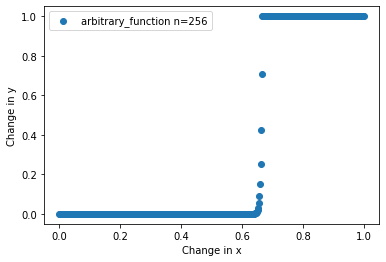

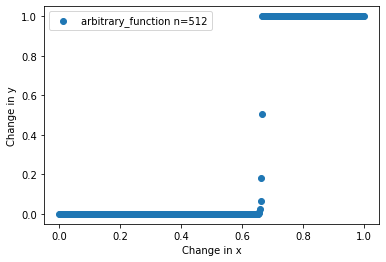

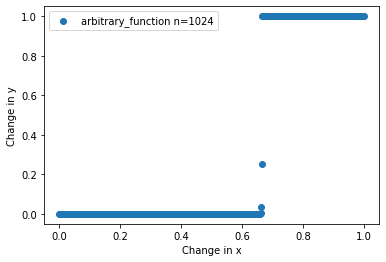

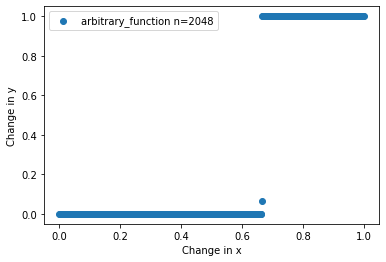

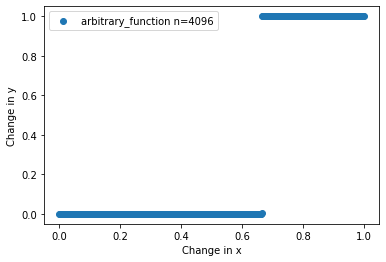

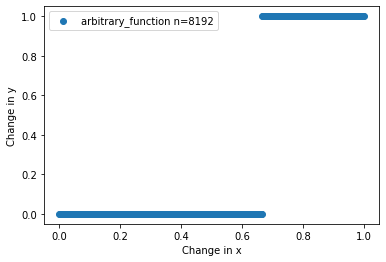

In [76]:
# arbitrary function which is continous on [0,1] while param = 1
def arbitraryFunction(x,n):
    if x >= 0 and x < 2/3: 
        return (x+1/3)**n
    else:
        return 1
# utility function that gets the x co-ordinates from 0 to 1
def getValues(size):
    values = np.linspace(0,1,size)
    return values
x = getValues(500)

# changing the parameter n
n_values = [1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192]

# plotting the graphs for each parameter
for n in n_values:
    y = [arbitraryFunction(i,n) for i in x]
    plt.scatter(x,y,label=f'arbitrary_function n={n}')
    plt.xlabel('Change in x')
    plt.ylabel('Change in y')
    plt.legend()
    plt.show()

The function defined is:
$$f_n(x)=\begin{cases}
\left(x+\frac{1}{3}\right)^n,&\text{if }0\le x<\frac{2}{3}\\\\
1,&\text{if } \frac{2}{3}\le x\le 1\;.
\end{cases}$$

Clearly one can see that the initial function with value $n = 1$ ($f_1$) is continous from the graph and belongs to C[0,1]. \\
While the same function with value n sufficiently high($n > 500$) ($f_n$) yields the values 0 and 1 for two different continous intervals in the interval [0,1] and also one can observe that the graph is discontinous. \\
Thus contradicting the property that the function belongs to C[0,1] where c[0,1] is the space of continous functions in [0,1]. \\

Hence shown pictorically that the function defined on space of continous functions in the interval [0,1] is incomplete with respect to the metric derived from L1 norm.

# **3. Entropy**

In [77]:
# function that calculates entropy with taking pmf as input
# and returns the entropy
# 3 a
def calculateEntropy(pmf):
    np_pmf = np.array(pmf)
    log_multiplier = lambda x : -x*np.log2(x)
    # checking for ambiguity case when x = 0
    entropy = [log_multiplier(x) if x != 0 else 0 for x in np_pmf]
    total_entropy = np.sum(entropy)
    return total_entropy

# utility bernoulli function which returns p
def bern(p):
    return [p,1-p]

In [78]:
pmf = [0.4,0.35,0.25,0]
entropy = calculateEntropy(pmf)
print('Entropy calculated for the given pmf : ',entropy)

Entropy calculated for the given pmf :  1.5588718484453603


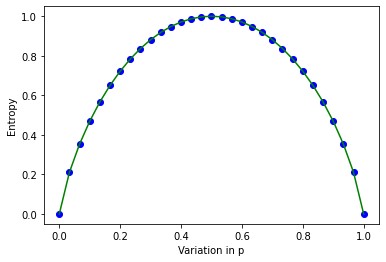

In [79]:
# 3 b
pmf_pair = []
pmf_p = []

def fill_pmf(size):
    for i in range(0,size+1):
        p = i/size
        pmf_pair.append(bern(p))
        pmf_p.append(p)

fill_pmf(30)

# calculating the entropy of the bernoulli distributions
entropy = [calculateEntropy(entry) for entry in pmf_pair]

# plotting the entropy vs bern(p) as function of p
plt.scatter(pmf_p,entropy,color='b')
plt.xlabel('Variation in p')
plt.ylabel('Entropy')
plt.plot(pmf_p,entropy,color='g')

**3.b** \\
Clearly from the graph, the max entropy is obtained when the p and 1-p are the same, i.e when the p tends to fairness entropy becomes maximum suggesting that when fairness increases, it requires maximum number of bits to convey the information.

# **4. Image Entropy and Histograms**

In [80]:
# color array
colors = ['r','g','b','k','y','m','c']

# 4 a
# function which plots the histogram which takes image(matrix) read as input
def plotNormalizedHistoGram(image):
    # gray scales in the range from 0 to 255 inclusive
    gray_scales = [0]*256

    # iterate over the matrix and update the frequency
    for i in image:
        for j in i:
            gray_scales[j] += 1

    # find total number of pixels to normalize
    pixels = np.sum(gray_scales)
    # normalize the frequency of pixels
    normalized_gray_scales = [pixel/pixels for pixel in gray_scales]
    # plot the graph
    plt.bar(np.arange(len(normalized_gray_scales)),normalized_gray_scales,align='edge',color=colors)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Normalized Values')
    plt.show()
    # return the normalized values which acts as pmf
    return normalized_gray_scales

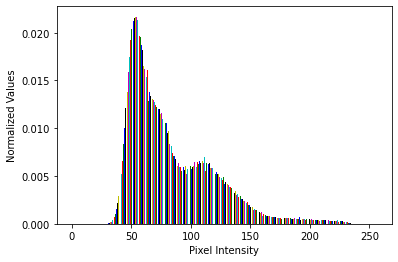

Entropy for airport image(5.3.02.tiff) : 6.830329520172172


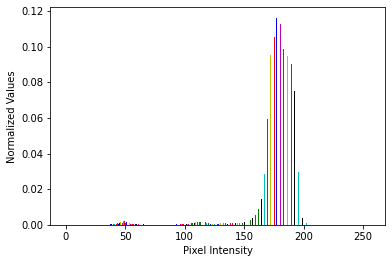

Entropy for aeroplane image(7.1.02.tiff) : 4.004499444666612


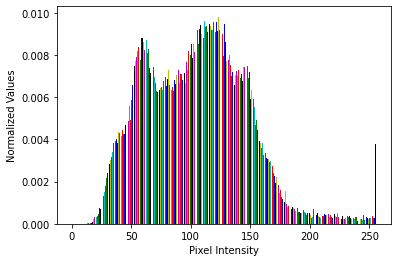

Entropy for chemicalplant image(5.1.14.tiff) : 7.34243251289401


In [81]:
# read images
# 5.3.02.tiff image airport
img_airport = plt.imread('/content/drive/MyDrive/deeplearning/assignment1/airport.tiff')
# 7.1.02.tiff image airplane
img_aeroplane = plt.imread('/content/drive/MyDrive/deeplearning/assignment1/aeroplane.tiff')
# 5.1.14.tiff image chemicalplant
img_chemicalplant = plt.imread('/content/drive/MyDrive/deeplearning/assignment1/chemicalplant.tiff')

# 4 b
# plot histogram, get pmfs and calculate entropy
pmf_airport = plotNormalizedHistoGram(img_airport)
entropy_airport = calculateEntropy(pmf_airport)
print(f'Entropy for airport image(5.3.02.tiff) : {entropy_airport}')
pmf_aeroplane = plotNormalizedHistoGram(img_aeroplane)
entropy_aeroplane = calculateEntropy(pmf_aeroplane)
print(f'Entropy for aeroplane image(7.1.02.tiff) : {entropy_aeroplane}')
pmf_chemicalplant = plotNormalizedHistoGram(img_chemicalplant)
entropy_chemicalplant = calculateEntropy(pmf_chemicalplant)
print(f'Entropy for chemicalplant image(5.1.14.tiff) : {entropy_chemicalplant}')

4.b \\

The observations are as follows: 

1.   The whiter the image, the dense will be in the right part of histogram
2.   The darker the image, the left part will be dense.
3.   It is obvious from the graph, the more the probability of pixels, the more the entropy becomes as it contributes significantly to the entropy. 




# **5. Joint Pmf and Joint Entropy**

In [82]:
# 5 a
# function that takes in two images, plots normalized histogram and returns normalized histogram
def plotJointHistogram(img_left,img_right):
    # scaling to 0-225 from 0-1
    img_left = np.array(img_left)*255
    img_right = np.array(img_right)*255
    # rounding to the integer
    img_left = img_left.astype(int)
    img_right = img_right.astype(int)

    # freq of joint pixels
    pixels = np.zeros((256,256))
    r,c = img_left.shape

    # update the pixel matrix
    for i in range(0,r):
        for j in range(0,c):
            x,y = img_left[i][j],img_right[i][j]
            pixels[x][y] += 1

    total_pixels = r*c    

    # attributes for plotting for 3d bar chart
    x,y,z,dx,dy,dz = [],[],[],[],[],[]
    for i in range(0,256):
        for j in range(0,256):
            x.append(i)
            y.append(j)
            dz.append(pixels[i][j]/total_pixels)

    dx = [0.6]*256*256
    dy = [0.6]*256*256
    z = [0]*256*256

    # plot the figure and return the normalized values
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.bar3d(x,y,z,dx,dy,dz,color='r')

    plt.title('Normalized Joint Histogram')
    plt.show()
    return pixels/total_pixels

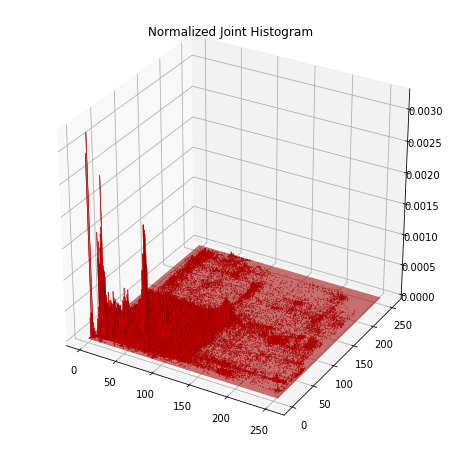

In [83]:
# read images
image_left = plt.imread('/content/drive/MyDrive/deeplearning/assignment1/left.png')
image_right = plt.imread('/content/drive/MyDrive/deeplearning/assignment1/right.png')
# plot joint histogram and get joint pmf
joint_pmf = plotJointHistogram(image_left,image_right)

In [84]:
# 5 b,
# entropy function, same as that of 3.a but written once more

def calculateJointEntropy(joint_pmf):
    joint_pmf = joint_pmf.flatten()
    np_pmf = np.array(joint_pmf)
    log_multiplier = lambda x : -x*np.log2(x)
    # checking for ambiguity case when x = 0
    entropy = [log_multiplier(x) if x != 0 else 0 for x in np_pmf]
    total_entropy = np.sum(entropy)
    return total_entropy
     
# 5 c
# testing with joint pmf obtained from 5.a
print('Entropy of the joint stero pair : ',calculateJointEntropy(joint_pmf))

Entropy of the joint stero pair :  13.675203263382306


# **6. Conditional Pmf and Conditional Entropy**

**6.a** \\
Index is to decide whether the condition is upon row or column, it can be done using int or boolean or any other data structure, in which I used string literal to decide. 

```
    'r' is defined to be row
    'c' is defined to be col
```




In [85]:
# 6 a
# input : joint_pmf, index (whether row or column, used string literal as index, value(int))
def getConditionalPmf(joint_pmf,index,value):
    if index == 'r':
        row = joint_pmf[value]
        sum = np.sum(row)
        return row/sum if sum != 0 else np.zeros(len(row))
    elif index == 'c':
        col = joint_pmf[:,value]
        sum = np.sum(col)
        return col/sum if sum != 0 else np.zeros(len(col))

conditional_pmf = getConditionalPmf(joint_pmf,'c',129)
print('Got conditional Pmf successfully')
# not printing the pmf because it's a large list

Got conditional Pmf successfully


6.b \\
As we are using 6.a conditional pmf property, we abide by the same rules mentioned above for the index.

In [86]:
# conditional entropy takes in joint pmf, takes in row or column and returns the corresponding conditional entropy
def calculateConditionalEntropy(joint_pmf,index):
    conditional_entropy = 0
    if index == 'r':
        for i in range(len(joint_pmf)):
            r_pmf = getConditionalPmf(joint_pmf,'r',i)
            for j in range(len(joint_pmf[i])):
                conditional_entropy -= joint_pmf[i][j]*np.log2(r_pmf[j]) if r_pmf[j] != 0 else 0
    else:
        for i in range(len(joint_pmf[0])):
            c_pmf = getConditionalPmf(joint_pmf,'c',i)
            for j in range(len(joint_pmf[:,i])):
                conditional_entropy -= joint_pmf[j][i]*np.log2(c_pmf[j]) if c_pmf[j] != 0 else 0
    return conditional_entropy


conditional_entropy_r = calculateConditionalEntropy(joint_pmf,'r')
print('Conditional Entropy (row) : ',conditional_entropy_r)
conditional_entropy_c = calculateConditionalEntropy(joint_pmf,'c')
print('Conditional Entropy (col) : ',conditional_entropy_c)

Conditional Entropy (row) :  6.416909158632463
Conditional Entropy (col) :  6.396577731686122


# **7. KL Divergence**


In [87]:
# 7.a

# function which takes two pmfs and returns cross entropy
def calculateCrossEntropy(p,q):
    np_p = np.array(p)
    np_q = np.array(q)
    log_multiplier = lambda x,y : -x*np.log2(y)
    indi_entropy = [log_multiplier(x,y) if y != 0 else 0 for x,y in zip(np_p,np_q)]
    total_entropy = np.sum(indi_entropy)
    return total_entropy

# function which calculates KL divergence
def calculateKlDivergence(p,q):
    entropy = calculateEntropy(p)
    cross_entropy = calculateCrossEntropy(p,q)
    kl_divergence = cross_entropy-entropy
    return kl_divergence


In [88]:
# p = [0.1,0.2,0.3,0.4]
# q = [0.1,0.3,0.1,0.5]

p = [0.2,0.05,0.14,0.01,0.2,0.3,0.1]
q = [0.1,0.3,0.2,0.01,0.14,0.05,0.2]

kl_divergence = calculateKlDivergence(p,q)
print('KL Divergence of pmf pair p & q : ',kl_divergence)


KL Divergence of pmf pair p & q :  0.7771150155500752


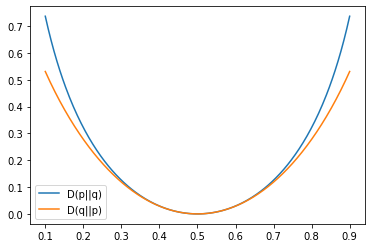

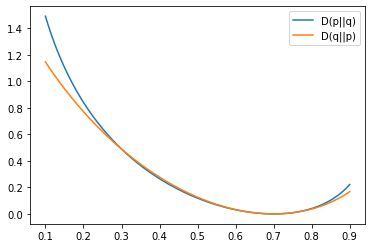

In [89]:
# 7.b plotting D(p||q) and D(q||p)
p = bern(0.5)
q = np.linspace(0.1,0.9,315)
# D(p||q)
var_entropy_pq = []
for i in range(len(q)):
    var_entropy_pq.append(calculateKlDivergence(p,bern(q[i])))
plt.plot(q,var_entropy_pq,label = 'D(p||q)')

# D(q||p)
var_entropy_qp = []
for i in range(len(q)):
    var_entropy_qp.append(calculateKlDivergence(bern(q[i]),p))
plt.plot(q,var_entropy_qp,label = 'D(q||p)')
plt.legend()
plt.show()

p = bern(0.7)
# D(p||q)
var_entropy_pq_ = []
for i in range(len(q)):
    var_entropy_pq_.append(calculateKlDivergence(p,bern(q[i])))
plt.plot(q,var_entropy_pq_,label = 'D(p||q)')

# D(q||p)
var_entropy_qp_ = []
for i in range(len(q)):
    var_entropy_qp_.append(calculateKlDivergence(bern(q[i]),p))
plt.plot(q,var_entropy_qp_,label = 'D(q||p)')
plt.legend()
plt.show()

7.b.2 \\
From the graph it is clear that the KL divergence observed is indeed non negative

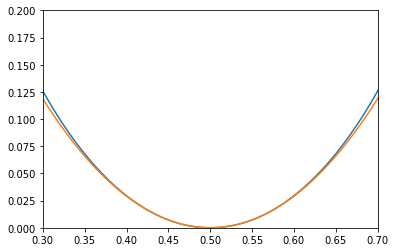

In [90]:
# 7.b.3

plt.plot(q,var_entropy_pq,label = 'D(p||q)')
plt.plot(q,var_entropy_qp,label = 'D(q||p)')
plt.xlim([0.3,0.7])
plt.ylim([0,0.2])
plt.show()

7.b.3 \\
After trying various graphs, it is somewhat conclusive that the graphs, intersect only when ```r == s``` with value as 0 and doesn't intersect for \\
 ```r != s```. If we zoom properly it'll be more conclusive that they intersect only when ```r == s``` and at ```value = 0```.

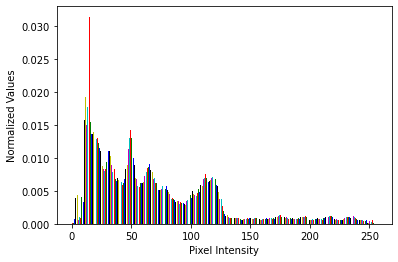

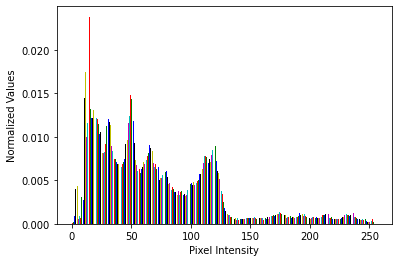

D(left_pmf||right_pmf) :  0.015104015237385582
D(right_pmf||left_pmf) :  0.014409785833353617


In [91]:
# 7 d
left = plt.imread('/content/drive/MyDrive/deeplearning/assignment1/left.png')
right = plt.imread('/content/drive/MyDrive/deeplearning/assignment1/right.png')

left = np.array(left)*255
right = np.array(right)*255
left = left.astype(int)
right = right.astype(int)

pmf_left = plotNormalizedHistoGram(left)
pmf_right = plotNormalizedHistoGram(right)

print('D(left_pmf||right_pmf) : ',calculateKlDivergence(pmf_left,pmf_right))
print('D(right_pmf||left_pmf) : ',calculateKlDivergence(pmf_right,pmf_left))

7.d

The measure KL divergence is basically the difference between the cross entropy and entropy of the pmfs. Applying this to two different images on one, gives the divergence measure of the two images, i.e it gives the difference between two probability distributions. \\

It gives the better information for gray scale images as the values observed are 0.015 and 0.014. These values are low on any scale. So the KL divergence method acts as a good metric for gray scale images.